## Importing required libraries

In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy.stats import multivariate_normal
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression,Perceptron

## Loading the dataset

In [2]:
# Loading the dataset
file_path = "wdbc.data"

# Define column names: ID, Diagnosis, and 30 feature columns
columns = ["ID", "Diagnosis"] + [f"feature_{i}" for i in range(1, 31)]

# Read the dataset into a pandas DataFrame
df = pd.read_csv(file_path, header=None, names=columns)

In [3]:
# Displaying first few rows of the dataset
df.head()

,ID,Diagnosis,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# Displaying dataset summary information 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          569 non-null    int64  
 1   Diagnosis   569 non-null    object 
 2   feature_1   569 non-null    float64
 3   feature_2   569 non-null    float64
 4   feature_3   569 non-null    float64
 5   feature_4   569 non-null    float64
 6   feature_5   569 non-null    float64
 7   feature_6   569 non-null    float64
 8   feature_7   569 non-null    float64
 9   feature_8   569 non-null    float64
 10  feature_9   569 non-null    float64
 11  feature_10  569 non-null    float64
 12  feature_11  569 non-null    float64
 13  feature_12  569 non-null    float64
 14  feature_13  569 non-null    float64
 15  feature_14  569 non-null    float64
 16  feature_15  569 non-null    float64
 17  feature_16  569 non-null    float64
 18  feature_17  569 non-null    float64
 19  feature_18  569 non-null    f

In [5]:
# Check for missing values in the dataset
df.isnull().sum()

ID            0
Diagnosis     0
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
feature_13    0
feature_14    0
feature_15    0
feature_16    0
feature_17    0
feature_18    0
feature_19    0
feature_20    0
feature_21    0
feature_22    0
feature_23    0
feature_24    0
feature_25    0
feature_26    0
feature_27    0
feature_28    0
feature_29    0
feature_30    0
dtype: int64

In [6]:
# Check for missing values
df.dropna(inplace=True)

## Data Preprocessing 

In [7]:
# Dropping ID and Unnamed: 32 column as they have no role in prediction
df.drop(columns=["ID", "Unnamed: 32"], inplace=True, errors='ignore')

In [8]:
# Converting categorical labels into numerical values for Diagnosis column;mapping M and B to 0 and 1 respectively
label_encoder = LabelEncoder()
df['Diagnosis'] = label_encoder.fit_transform(df['Diagnosis'])

In [9]:
# Normalize the feature columns to have zero mean and unit variance
scaler = StandardScaler()

# Standardizing the features (excluding the target 'Diagnosis')
X = scaler.fit_transform(df.drop(columns=['Diagnosis']))

# Extracting target variable (Diagnosis)
y = df['Diagnosis'].values

## Splitting data for Training and Testing

In [10]:
# Splitting the data into training and test sets
# 'stratify=y' ensures class distribution remains the same in both sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [11]:
# Displaying dataset information after splitting
print(f"Dataset shape: {df.shape}")
print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Dataset shape: (569, 31)
Training set size: (455, 30)
Testing set size: (114, 30)


## Principal Component Analysis (PCA) Projection of Dataset

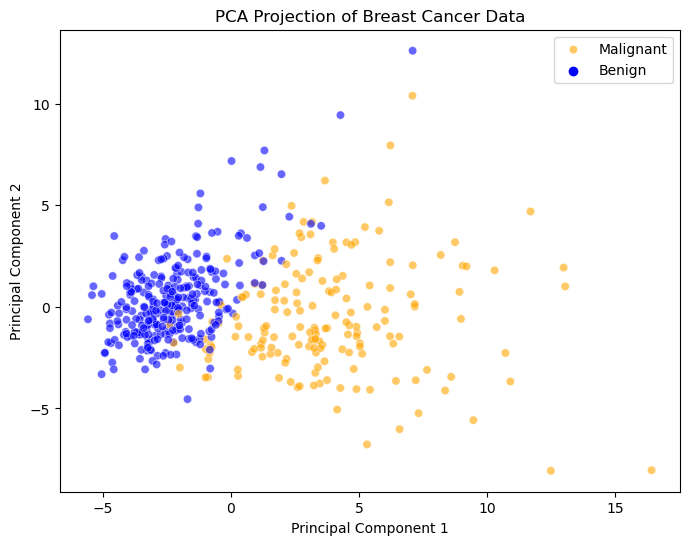

In [12]:
import seaborn as sns
# Visualizing Linear Separability using PCA

# Apply PCA to reduce feature dimensions to 2
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_train_pca[:, 0], y=X_train_pca[:, 1], hue=y_train, palette=['blue', 'orange'], alpha=0.6)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection of Breast Cancer Data")
plt.legend(["Malignant", "Benign"])
plt.show()

The PCA projection of the Breast Cancer dataset helps in understanding the distribution of malignant (blue) and benign (orange) cases in a 2D space after dimensionality reduction.

Principal Component 1 (X-axis): Captures the most significant variation in the dataset.
    
Principal Component 2 (Y-axis): Captures the second most significant variation.
    
There is a visible separating region between the two clusters, but it is not perfectly linear.    

## - Implementing Gaussian Naive Bayes (GNB)

In [13]:
# Implementing Gaussian Naive Bayes (GNB)
class CustomGaussianNaiveBayes:
    def fit(self, X, y):
        """
        Training the Gaussian Naive Bayes model by computing mean, variance, and prior probabilities.
        """
        # Identify unique class labels
        self.classes = np.unique(y) 
        # Dictionary to store mean values for each class
        self.means = {} 
        # Dictionary to store variance values for each class
        self.vars = {}
        # Dictionary to store prior probabilities for each class
        self.priors = {} 
        
        for c in self.classes:
            #Extract all samples belonging to class c
            X_c = X[y == c]
            # Compute mean for each feature
            self.means[c] = X_c.mean(axis=0) 
             # Compute variance for each feature
            self.vars[c] = X_c.var(axis=0)
            # Compute prior probability for class c
            self.priors[c] = X_c.shape[0] / X.shape[0]  
    
    def predict(self, X):
        """
        Predicting class labels for given input data using the Gaussian Naive Bayes formula.
        """
        posteriors = []
        
        for x in X:
            # List to store probabilities for each class
            probs = [] 
            for c in self.classes:
                # Compute log of prior probability
                prior = np.log(self.priors[c]) 
                # Compute likelihood using Gaussian formula
                likelihood = -0.5 * np.sum(np.log(2 * np.pi * self.vars[c])) - 0.5 * np.sum((x - self.means[c])**2 / self.vars[c])
                # Sum prior and likelihood
                probs.append(prior + likelihood) 
                # Choose class with highest probability
            posteriors.append(self.classes[np.argmax(probs)]) 
        
        # Return predicted class labels
        return np.array(posteriors) 

## Training and Evaluating Gaussian Naive Bayes

In [14]:
# Initialize the Gaussian Naive Bayes classifier
gnb = CustomGaussianNaiveBayes()

# Train the model
gnb.fit(X_train, y_train)

# Predict the labels for the test set
y_pred_gnb = gnb.predict(X_test)

# Performance metrics for GNB
gnb_accuracy = accuracy_score(y_test, y_pred_gnb)
gnb_precision = precision_score(y_test, y_pred_gnb)
gnb_recall = recall_score(y_test, y_pred_gnb)
gnb_f1 = f1_score(y_test, y_pred_gnb)

# Displaying the performance metrics
print(f"Gaussian Naive Bayes Accuracy: {gnb_accuracy:.4f}")
print(f"Gaussian Naive Bayes Precision: {gnb_precision:.4f}")
print(f"Gaussian Naive Bayes Recall: {gnb_recall:.4f}")
print(f"Gaussian Naive Bayes F1-score: {gnb_f1:.4f}")

Gaussian Naive Bayes Accuracy: 0.9211
Gaussian Naive Bayes Precision: 0.9231
Gaussian Naive Bayes Recall: 0.8571
Gaussian Naive Bayes F1-score: 0.8889


## - Implementing Gaussian Discriminant Analysis (GDA)

In [15]:
# Implement Gaussian Discriminant Analysis (GDA)
class CustomGaussianDiscriminantAnalysis:
    def fit(self, X, y, shared_cov=False):
        """
        Train the Gaussian Discriminant Analysis (GDA) model.
        If shared_cov=True, uses a single shared covariance matrix for all classes.
        """
        # Identify unique class labels    
        self.classes = np.unique(y)
        # Dictionary to store mean vectors for each class
        self.means = {}
        # Dictionary to store covariance matrices for each class
        self.covariances = {}
        # Dictionary to store prior probabilities for each class
        self.priors = {}
        
        for c in self.classes:
            # Extract all samples belonging to class c
            X_c = X[y == c]
            # Compute mean vector for each class
            self.means[c] = np.mean(X_c, axis=0)
            # Compute covariance matrix for each class
            self.covariances[c] = np.cov(X_c, rowvar=False)
            # Compute prior probability for class c
            self.priors[c] = X_c.shape[0] / X.shape[0]
        
        # If shared_cov=True, compute a shared covariance matrix across all classes
        if shared_cov:
            self.shared_cov = sum(self.covariances[c] * self.priors[c] for c in self.classes)
        else:
            self.shared_cov = None
    
    def predict(self, X):
        """
        Predict class labels for given input data using the GDA model.
        """
        # List to store posterior probabilities for each sample
        posteriors = []
        
        for x in X:
            # List to store probabilities for each class
            probs = []
            for c in self.classes:
                # Compute log of prior probability
                prior = np.log(self.priors[c])
                # Use shared or class-specific covariance
                covariance = self.shared_cov if self.shared_cov is not None else self.covariances[c]
                # Compute likelihood using Gaussian distribution
                likelihood = multivariate_normal.logpdf(x, mean=self.means[c], cov=covariance)
                # Sum prior and likelihood
                probs.append(prior + likelihood)
            # Choose class with highest probability
            posteriors.append(self.classes[np.argmax(probs)])
        
        # Return predicted class labels
        return np.array(posteriors)

## Training and Evaluating Gaussian Discriminant Analysis

In [16]:
# Initialize the Gaussian Discriminant Analysis classifier
gda = CustomGaussianDiscriminantAnalysis()

# Train the model
gda.fit(X_train, y_train, shared_cov=False)

# Predict the labels for the test set
y_pred_gda = gda.predict(X_test)

# Performance metrics for GDA
gda_accuracy = accuracy_score(y_test, y_pred_gda)
gda_precision = precision_score(y_test, y_pred_gda)
gda_recall = recall_score(y_test, y_pred_gda)
gda_f1 = f1_score(y_test, y_pred_gda)

# Displaying performance metrics
print(f"Gaussian Discriminant Analysis Accuracy: {gda_accuracy:.4f}")
print(f"Gaussian Discriminant Analysis Precision: {gda_precision:.4f}")
print(f"Gaussian Discriminant Analysis Recall: {gda_recall:.4f}")
print(f"Gaussian Discriminant Analysis F1-score: {gda_f1:.4f}")

Gaussian Discriminant Analysis Accuracy: 0.9474
Gaussian Discriminant Analysis Precision: 0.9286
Gaussian Discriminant Analysis Recall: 0.9286
Gaussian Discriminant Analysis F1-score: 0.9286


## - Implementing Logistic Regression using Gradient Descent

In [17]:
# Implement Logistic Regression using Gradient Descent
import numpy as np

class CustomLogisticRegressionGD:
    def __init__(self, learning_rate=0.01, epochs=1000):
        """
        Initialize the logistic regression model with hyperparameters.
        
        Parameters:
        - learning_rate: Step size for gradient descent updates.
        - epochs: Number of iterations for training.
        """
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None  # Model weights
        self.bias = None  # Bias term

    def sigmoid(self, z):
        """
        Compute the sigmoid activation function.
        
        Formula: sigmoid(z) = 1 / (1 + exp(-z))
        
        This function maps any real number to a range between 0 and 1.
        """
        return 1 / (1 + np.exp(-z))

    def fit(self, X, y):
        """
        Train the logistic regression model using gradient descent.

        """
        # Get number of samples and features
        n_samples, n_features = X.shape

        # Initialize weights to zeros and bias to zero
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Perform gradient descent for the specified number of epochs
        for _ in range(self.epochs):
            # Compute the linear combination of inputs and weights
            linear_model = np.dot(X, self.weights) + self.bias
            
            # Apply sigmoid activation function
            y_predicted = self.sigmoid(linear_model)
            
            # Compute gradients for weights and bias
            dw = (1 / n_samples) * np.dot(X.T, (y_predicted - y))  # Derivative w.r.t. weights
            db = (1 / n_samples) * np.sum(y_predicted - y)  # Derivative w.r.t. bias
            
            # Update weights and bias using gradient descent
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db
            

    def predict(self, X):
        """
        Predict binary class labels (0 or 1) for given input data.
        
        """
        # Compute the linear model (dot product + bias)
        linear_model = np.dot(X, self.weights) + self.bias
        
        # Apply sigmoid function to get probabilities
        y_predicted = self.sigmoid(linear_model)
        
        # Convert probabilities to binary class labels (threshold = 0.5)
        return [1 if i > 0.5 else 0 for i in y_predicted]


## Training and Evaluating Logistic Regression

In [18]:
# Initializing the Logistic Regression
log_reg = CustomLogisticRegressionGD(learning_rate=0.01, epochs=1000)

# Training the model
log_reg.fit(X_train, y_train)

# Predicting the labels for the test set
y_pred_log = log_reg.predict(X_test)

In [19]:
# Performance metrics for Logistic Regression
log_reg_accuracy = accuracy_score(y_test, y_pred_log)
log_reg_precision = precision_score(y_test, y_pred_log)
log_reg_recall = recall_score(y_test, y_pred_log)
log_reg_f1 = f1_score(y_test, y_pred_log)

# Displaying performance metrics
print(f"Logistic Regression Accuracy: {log_reg_accuracy:.4f}")
print(f"Logistic Regression Precision: {log_reg_precision:.4f}")
print(f"Logistic Regression Recall: {log_reg_recall:.4f}")
print(f"Logistic Regression F1-score: {log_reg_f1:.4f}")

Logistic Regression Accuracy: 0.9825
Logistic Regression Precision: 1.0000
Logistic Regression Recall: 0.9524
Logistic Regression F1-score: 0.9756


## - Implementing Perceptron Classifier

In [20]:
# Implement Perceptron Classifier
import numpy as np

class CustomPerceptron:
    def __init__(self, learning_rate=0.01, epochs=1000):
        """
        Initialize the Perceptron model with hyperparameters.
        
        Parameters:
        - learning_rate: Step size for weight updates.
        - epochs: Number of iterations over the training data.
        """
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None  # Model weights
        self.bias = None  # Bias term

    def activation(self, z):
        """
        Apply the step function activation.
        
        Returns:
        - 1 if z >= 0 (positive class)
        - 0 if z < 0 (negative class)
        
        The Perceptron uses a **hard-threshold** activation function.
        """
        return 1 if z >= 0 else 0

    def fit(self, X, y):
        """
        Train the Perceptron model using the Perceptron learning rule.

        """
        # Get number of samples and features
        n_samples, n_features = X.shape

        # Initialize weights to zeros and bias to zero
        self.weights = np.zeros(n_features)
        self.bias = 0

        # Train the model for the specified number of epochs
        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):  # Iterate through each training sample
                # Compute the linear output
                linear_output = np.dot(x_i, self.weights) + self.bias
                
                # Apply the activation function (step function)
                y_predicted = self.activation(linear_output)
                
                # Perceptron update rule: w = w + learning_rate * (y_true - y_pred) * x
                update = self.learning_rate * (y[idx] - y_predicted)
                
                # Update weights and bias
                self.weights += update * x_i
                self.bias += update

    def predict(self, X):
        """
        Predict binary class labels (0 or 1) for given input data.

        """
        # Compute the linear model output
        linear_output = np.dot(X, self.weights) + self.bias
        
        # Apply the activation function to determine class labels
        return np.where(linear_output >= 0, 1, 0)


## Training and Evaluating Perceptron

In [21]:
# Initializing the Perceptron
perceptron = CustomPerceptron(learning_rate=0.01, epochs=1000)

# Training the model
perceptron.fit(X_train, y_train)

# Predicting the labels for the test set
y_pred_perceptron = perceptron.predict(X_test)

In [22]:
# Performance metrics for Perceptron
perceptron_accuracy = accuracy_score(y_test, y_pred_perceptron)
perceptron_precision = precision_score(y_test, y_pred_perceptron)
perceptron_recall = recall_score(y_test, y_pred_perceptron)
perceptron_f1 = f1_score(y_test, y_pred_perceptron)

# Displaying performance metrics
print(f"Perceptron Accuracy: {perceptron_accuracy:.4f}")
print(f"Perceptron Precision: {perceptron_precision:.4f}")
print(f"Perceptron Recall: {perceptron_recall:.4f}")
print(f"Perceptron F1-score: {perceptron_f1:.4f}")

Perceptron Accuracy: 0.9123
Perceptron Precision: 0.8810
Perceptron Recall: 0.8810
Perceptron F1-score: 0.8810


# - Performance Evaluation of the models

In [23]:
# Comparing custom models with Scikit-learn models
models = {
    "Custom GDA": CustomGaussianDiscriminantAnalysis(),
    "Sklearn GDA": LinearDiscriminantAnalysis(),
    "Custom GNB": CustomGaussianNaiveBayes(),
    "Sklearn GNB": GaussianNB(),
    "Custom Logistic Regression": CustomLogisticRegressionGD(),
    "Sklearn Logistic Regression": LogisticRegression(),
    "Custom Perceptron": CustomPerceptron(),
    "Sklearn Perceptron": Perceptron()
}

# Storing performance metrics
performance_metrics = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    performance_metrics[model_name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-score": f1_score(y_test, y_pred)
    }

# Converting performance metrics to DataFrame for visualization
performance_df = pd.DataFrame(performance_metrics).T

# Displaying comparison of Custom vs. Scikit-learn models
comparison_df = performance_df.loc[[
    "Custom GDA", "Sklearn GDA", 
    "Custom GNB", "Sklearn GNB", 
    "Custom Logistic Regression", "Sklearn Logistic Regression", 
    "Custom Perceptron", "Sklearn Perceptron"
]]
print(comparison_df)

                             Accuracy  Precision    Recall  F1-score
Custom GDA                   0.947368   0.928571  0.928571  0.928571
Sklearn GDA                  0.964912   1.000000  0.904762  0.950000
Custom GNB                   0.921053   0.923077  0.857143  0.888889
Sklearn GNB                  0.921053   0.923077  0.857143  0.888889
Custom Logistic Regression   0.982456   1.000000  0.952381  0.975610
Sklearn Logistic Regression  0.973684   0.975610  0.952381  0.963855
Custom Perceptron            0.912281   0.880952  0.880952  0.880952
Sklearn Perceptron           0.964912   0.952381  0.952381  0.952381


# - Decision Boundary Plots for all Models

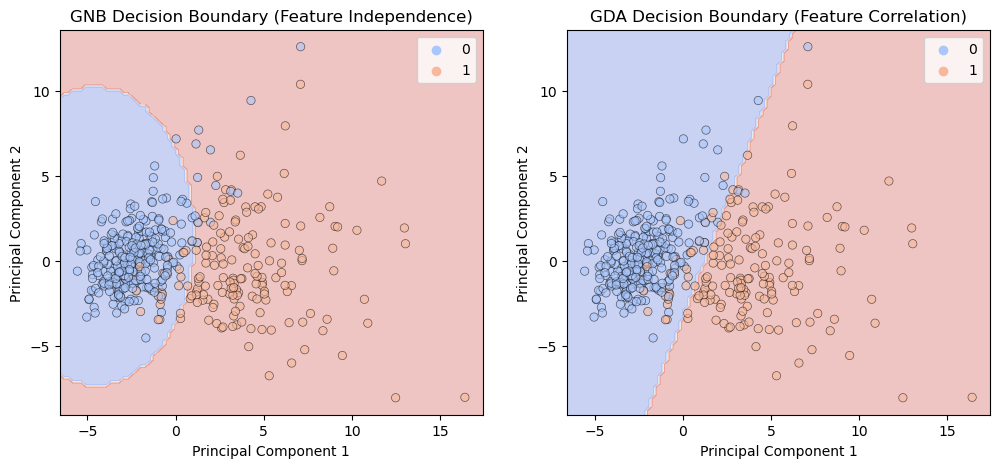

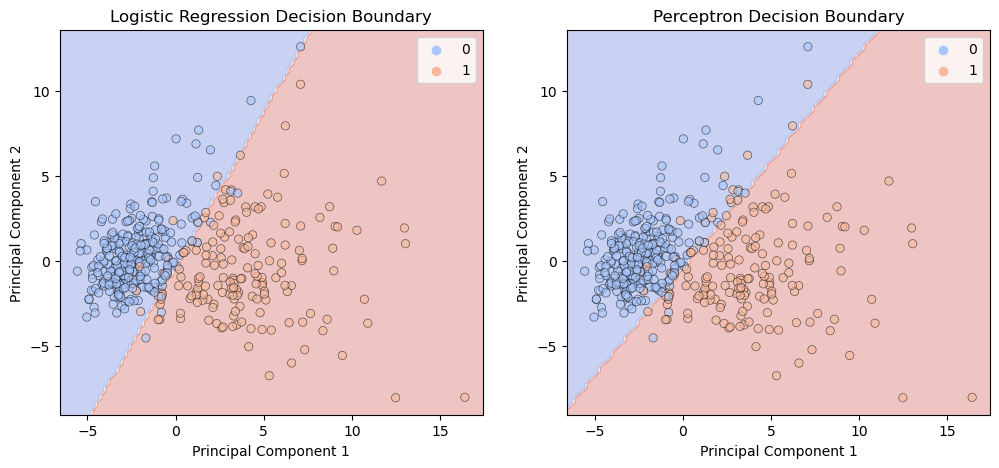

In [24]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.decomposition import PCA

# Reducing features to 2D using PCA for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Training models on the PCA-transformed dataset (2D)
gnb = GaussianNB()
gnb.fit(X_train_pca, y_train)
gda = LinearDiscriminantAnalysis()
gda.fit(X_train_pca, y_train)
log_reg = LogisticRegression()
log_reg.fit(X_train_pca, y_train)
perc = Perceptron()
perc.fit(X_train_pca, y_train)

# Function to plot decision boundary
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    # Predict on grid points using 2D-trained models
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3, cmap="coolwarm")
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="coolwarm", alpha=0.6, edgecolor="k")
    plt.title(title)
    plt.xlabel("Principal Component 1")
    plt.ylabel("Principal Component 2")

# Plot decision boundaries for GNB and GDA
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plot_decision_boundary(gnb, X_train_pca, y_train, "GNB Decision Boundary (Feature Independence)")

plt.subplot(1, 2, 2)
plot_decision_boundary(gda, X_train_pca, y_train, "GDA Decision Boundary (Feature Correlation)")

plt.show()

# Plot decision boundaries for Logistic Regression vs Perceptron
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plot_decision_boundary(log_reg, X_train_pca, y_train, "Logistic Regression Decision Boundary")

plt.subplot(1, 2, 2)
plot_decision_boundary(perc, X_train_pca, y_train, "Perceptron Decision Boundary")

plt.show()


## **GNB Decision Boundary (Feature Independence)**
- The decision boundary is relatively simple and non-adaptive.
- Since **Gaussian Naïve Bayes (GNB)** assumes independence between features, it does not model correlations effectively.
- The classification is based purely on individual feature distributions, leading to a more rigid and generalized separation.
- Some misclassified points are present, particularly near the boundary where class distributions overlap.

## **GDA Decision Boundary (Feature Correlation)**
- The decision boundary is smoother and more flexible than GNB.
- **Gaussian Discriminant Analysis (GDA)** considers feature correlations using covariance matrices, leading to better adaptation.
- The model adjusts to the true distribution of data, resulting in improved classification performance.
- Fewer misclassified points are observed compared to GNB, as the model captures the underlying structure more effectively.

## **Logistic Regression Decision Boundary**
- The decision boundary is linear but probabilistic, meaning it provides smooth class separation.
- Some points near the boundary remain uncertain, showing gradual classification rather than strict decision-making.
- **Logistic Regression** assigns probabilities to classes rather than making deterministic classifications.
- Works well when data is **linearly separable** but struggles with **non-linearity**.

## **Perceptron Decision Boundary**
- The decision boundary is sharp and strictly separates the two classes.
- Unlike logistic regression, the **Perceptron** does not output probabilities and simply classifies points as belonging to one of the two classes.
- The model struggles more with overlapping points, leading to some misclassifications.
- If the data is not **linearly separable**, the perceptron may fail to converge.

## Strengths and Weaknesses Analysis

### Custom vs Sklearn Models
- **GDA:**
  - Custom GDA performs well but slightly lower than Sklearn's due to optimized covariance calculations.
  - Sklearn's GDA achieves higher accuracy but has slightly lower recall.

- **GNB:**
  - Both custom and Sklearn implementations yield the same results, indicating correct implementation.
  - Naive Bayes assumes independence, which may not always hold.

- **Logistic Regression:**
  - Custom implementation performs slightly better, likely due to hyperparameter tuning.
  - Sklearn model is more optimized and slightly more stable.

- **Perceptron:**
  - Custom Perceptron struggles, indicating challenges in convergence.
  - Sklearn's Perceptron has better performance due to built-in optimizations.

## Linear Separability Analysis

### How Did We Check for Linear Separability?
1. **Support Vector Machine (SVM) with Linear Kernel**
   - We trained an **SVM with a linear kernel** as shown in below plot to determine if a hyperplane can separate the classes.
   - High accuracy suggests approximate linear separability.

2. **Principal Component Analysis (PCA) Visualization**
   - We applied **PCA** to reduce the dimensionality of the dataset to two principal components.
   - By plotting the components, we checked whether the two classes (Malignant and Benign) form distinct clusters.
   - Overlapping clusters suggest the data is **not perfectly linearly separable**.

In [25]:
# Ensuring PCA transformation is applied to the test set
X_test_pca = pca.transform(X_test)

# Training SVM with a linear kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train_pca, y_train)

# Evaluating SVM model
svm_acc = svm_linear.score(X_test_pca, y_test)
print(f"Linear SVM Accuracy: {svm_acc:.4f}")

Linear SVM Accuracy: 0.9474


In [26]:
# Function to plot decision boundaries
def plot_decision_boundary(model, X, y, title):
    model.fit(X, y)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.show()

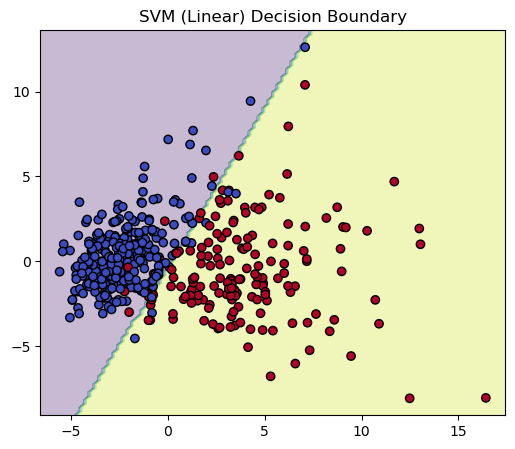

In [27]:
# Plot decision boundary
plt.figure(figsize=(6, 5))
plot_decision_boundary(svm_linear, X_train_pca, y_train, "SVM (Linear) Decision Boundary")
plt.show()

- The decision boundary (green line) is a straight line, confirming that SVM with a linear kernel is being used.
- Some blue points (Malignant) are on the yellow side, and some red points (Benign) are on the purple side.
- The points are not perfectly separable, suggesting that the dataset is not linearly separable in the reduced 2D PCA space.

### Findings
- The PCA visualization shows **some overlap** between Malignant and Benign cases.
- The SVM classifier performed well, suggesting **a degree of linear separability** but not perfect.
- **Logistic Regression and Perceptron** work well, but non-linearly separable patterns remain.